In [2]:
import convokit
from convokit import Corpus, download, TextCleaner, FightingWords

In [3]:
corpus = Corpus(download('movie-corpus'))

Dataset already exists at /Users/calebchiam/.convokit/downloads/movie-corpus


## Preprocessing step

In [4]:
tc = TextCleaner(verbosity=100000)

In [5]:
tc.transform(corpus)

100000/304713 utterances processed
200000/304713 utterances processed
300000/304713 utterances processed
304713/304713 utterances processed


## Constructing new metadata

In [6]:
for convo in corpus.iter_conversations():
    genders = set([spkr.meta['gender'] for spkr in convo.iter_speakers()])
    convo.meta['mixed'] = 'M' in genders and 'F' in genders

## Analysis step

In [7]:
fw = FightingWords()
fw.fit(corpus, 
       class1_func=lambda utt: utt.get_conversation().meta['mixed'],
       class2_func=lambda utt: not utt.get_conversation().meta['mixed'],
      )

Initializing default CountVectorizer with ngram_range (1, 3)... Done.
class1_func returned 100931 valid utterances. class2_func returned 203782 valid utterances.
Vocab size is 15000
Comparing language...
ngram zscores computed.


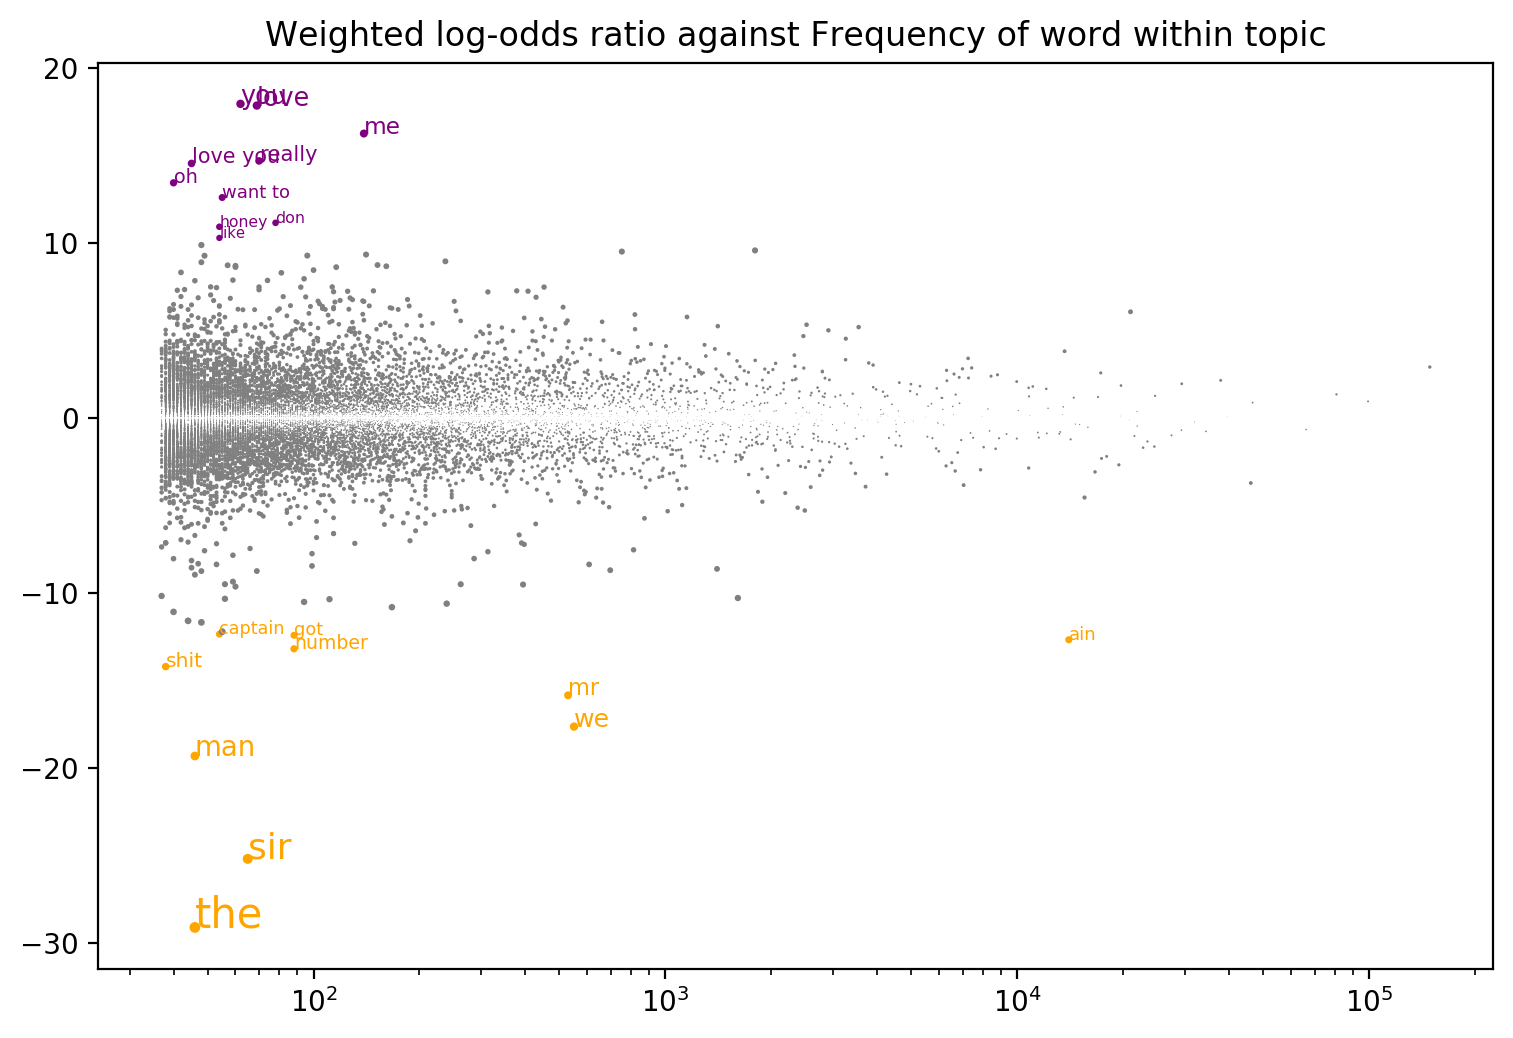

,z-score,class
ngram,,
the,-29.133167,class2
sir,-25.211811,class2
man,-19.330328,class2
we,-17.650018,class2
mr,-15.859251,class2
shit,-14.219375,class2
number,-13.201382,class2
ain,-12.684295,class2
got,-12.429083,class2


In [9]:
fw.summarize(corpus, plot=True)